# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pedem\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = load_dotenv('news_api')
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.141400,0.060389,0.026889,0.857167
std,0.395451,0.070001,0.052605,0.227559
min,-0.557400,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.855000
50%,0.000000,0.055000,0.000000,0.901000
75%,0.440400,0.091750,0.000000,0.989500
max,0.831600,0.246000,0.142000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.186860,0.067900,0.028350,0.903750
std,0.370757,0.048923,0.048258,0.062447
min,-0.557400,0.000000,0.000000,0.789000
25%,0.000000,0.022500,0.000000,0.861750
50%,0.296000,0.073500,0.000000,0.912500
75%,0.475725,0.096250,0.051500,0.938250
max,0.709600,0.144000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a slightly higher mean positive score with 0.0637.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score with 0.8316.

Q. Which coin had the highest positive score?

A: Bitcoin again with a 0.246.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'char', 'reuters', 'ha', 'cryptocurrency', 'million', '…'}
sw = sw.union(sw_addon)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    for word in text:
        if word in punctuation:
            text = text.replace(word, '')
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase & Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = []

for i in range(len(bitcoin_df)):
    try:
        bitcoin_tokens.append(tokenizer(bitcoin_df['text'][i]))
    except AttributeError:
        pass
    
bitcoin_df['tokens'] = bitcoin_tokens
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwide, photo, ..."
1,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, twitter, hac..."
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb..."
3,2021-03-03,,0.0000,0.000,0.000,0.000,[]
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,"[tldr, enter, complete, bitcoin, btc, investme..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_tokens = []
for i in range(len(ethereum_df)):
    try:
        ethereum_tokens.append(tokenizer(ethereum_df['text'][i]))
    except AttributeError:
        pass
ethereum_df['tokens'] = ethereum_tokens
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christies, sold, first..."
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwide, photo, ..."
2,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, 3060, sold, miner, sna..."
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"[heres, everything, need, know, nonfungible, t..."
4,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[opensea, one, handful, nft, marketplace, expl..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
bigram_counts_btc = []
for article in range(len(bitcoin_df['text'])):
    bigram_counts_btc.append(Counter(ngrams(word_tokenize(bitcoin_df['text'][article]), n=2)))

In [17]:
# Generate the Ethereum N-grams where N=2
bigram_counts_eth = []
for article in range(len(ethereum_df['text'])):
    bigram_counts_eth.append(Counter(ngrams(word_tokenize(ethereum_df['text'][article]), n=2)))

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
tokens_btc = []
for i in range(len(bitcoin_df['tokens'])):
    for n in range(len(bitcoin_df['tokens'][i])):
        tokens_btc.append(bitcoin_df['tokens'][i][n])
token_count(tokens_btc, N=10)

[('bitcoin', 9),
 ('staff', 4),
 ('photo', 3),
 ('hacker', 3),
 ('exchange', 3),
 ('new', 3),
 ('trading', 3),
 ('2021', 3),
 ('market', 3),
 ('india', 2)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
tokens_eth = []
for i in range(len(ethereum_df['tokens'])):
    for n in range(len(ethereum_df['tokens'][i])):
        tokens_eth.append(ethereum_df['tokens'][i][n])
token_count(tokens_eth, N=10)

[('new', 7),
 ('ethereum', 7),
 ('week', 6),
 ('digital', 5),
 ('token', 5),
 ('one', 4),
 ('nonfungible', 4),
 ('nfts', 4),
 ('company', 4),
 ('high', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

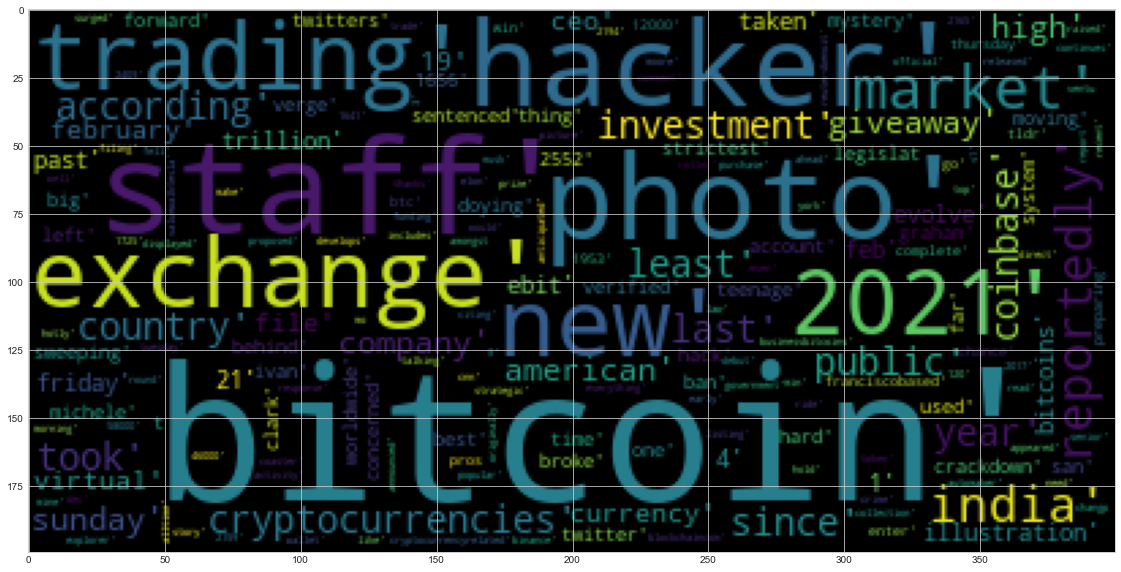

In [22]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(str(tokens_btc))
plt.imshow(wc_btc)

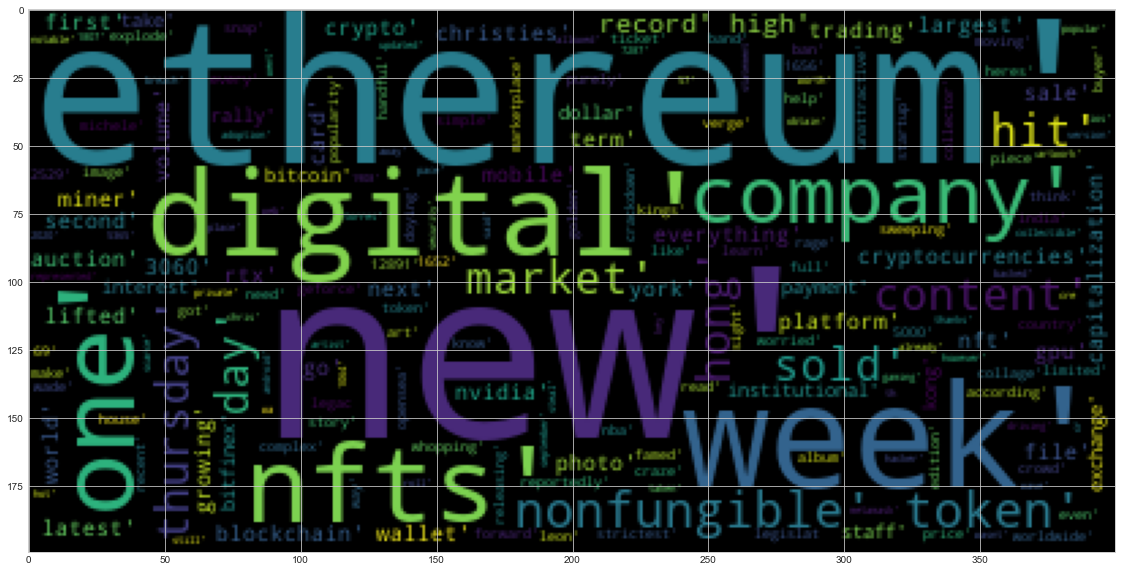

In [23]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(str(tokens_eth))
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_text = ''
for text in bitcoin_df['text']:
    btc_text += str(text)

In [28]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

In [29]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [30]:
# List all Entities
btc_ner.ents

(One,
 Photo,
 Michele Doying,
 India,
 Reuters,
 last years,
 Twitter,
 Graham Ivan Clark,
 Twitters,
 Coinbase,
 San Francisco,
 last year,
 Thursday,
 over $12,000,
 CNN,
 above $58,000,
 Sunday,
 just above $46,000,
 Tuesday,
 India,
 Reuters,
 $120 million,
 Moore Strategic Ventu,
 chars]This morning,
 Coinbase,
 American,
 19, 2021,
 Elon Musk,
 Binance,
 Changp,
 Reuters,
 Dec. 8, 2017,
 Benoit Tessier/Illustration,
 Reuters,
 Reuters,
 Bitcoin,
 January 21, 2021,
 Reuters,
 Reuters,
 Feb 21,
 Reuters,
 Sunday,
 two-month,
 $1 trillion,
 Friday,
 Reuters,
 Pristina,
 Kosovo,
 June 12, 2018,
 HONG KONG,
 Reuters Breakingviews,
 Feb. 19, 2021,
 Evolve,
 week of February,
 North American,
 4,
 Bitcoin,
 past $56,000,
 Friday,
 $1 trillion,
 U.S. Department of Justice,
 three,
 Lazarus,
 DPKR,
 a billion dollars,
 Bitcoin)

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_text = ''
for text in ethereum_df['text']:
    eth_text += str(text)

In [32]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

In [33]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [34]:
# List all Entities
eth_ner.ents

(Christies,
 first,
 $69 million,
 5,000,
 Photo,
 Michele Doying,
 India,
 Reuters,
 GeForce,
 3060,
 GPU,
 here.)OpenSea,
 NFT,
 recent weeks,
 these days,
 Kings,
 NBA,
 millions,
 Ethereum,
 first,
 Christie's,
 NFT,
 a few days,
 Chris Torres,
 one,
 Ethereum,
 September 2020,
 about $5.7 million,
 3060,
 GPU,
 next week,
 Nvidia,
 this morning,
 chars]NEW YORK,
 Reuters,
 second,
 Thursday,
 chars]NEW YORK,
 Feb 18,
 Reuters,
 second,
 Thursday,
 7.34%,
 the week ending 21st February,
 11.65%,
 the previous week,
 Ethereum ended,
 the week,
 1,935.57,
 the week,
 Coinbase,
 San Francisco,
 last year,
 Thursday,
 Bitfinex,
 Bitfinex,
 millions of dollars,
 Reuters,
 SINGAPORE,
 Reuters,
 Asian,
 Saturday,
 two-month,
 $1 trillion,
 a day earlier,
 World FX,
 Kevin Buckland,
 Reuters,
 Meitu,
 Hong Kong,
 China,
 March 24, 2017,
 Bobby Yip,
 HONG KONG,
 Reuters,
 Hong Ko)

---